In [107]:
import numpy as np
import pandas as pd

In [108]:
import os

In [109]:
import cv2

In [110]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
Datadir = "C:\\Users\\asbid\\Downloads\\kagglecatsanddogs_5340\\PetImages"

In [112]:
categories = ['Cat', 'Dog']

# Loading as Coloured Images

In [113]:
IMG_SIZE = 50

In [114]:
training_data =[]
def create_training_data():
    for category in categories:
        path = os.path.join(Datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [115]:
len(training_data)

24946

In [116]:
# Data Splitting

In [117]:
import random

In [118]:
random.shuffle(training_data)

In [119]:
X = []
y = []

In [120]:
for img, label in training_data:
    X.append(img)
    y.append(label)

In [121]:
X = np.array(X).reshape(-1, 7500)

In [122]:
X

array([[233, 244, 236, ..., 234, 242, 235],
       [ 39,  72,  89, ..., 104, 151, 172],
       [  0,   3,   3, ...,  21,  43,  71],
       ...,
       [ 21,  26,  24, ..., 157, 159, 148],
       [ 44,  50,  60, ...,  29,  19,  22],
       [101,  99,  99, ..., 138, 139,  67]], dtype=uint8)

In [123]:
X.shape

(24946, 7500)

In [124]:
y=np.array(y).reshape(-1,1)

In [229]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [126]:
labels=np.unique(y_test)
labels

array([0, 1])

# Loading as Black and White Images

In [19]:
training_data_BW =[]
def create_training_data_BW():
    for category in categories:
        path = os.path.join(Datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data_BW.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data_BW()

In [20]:
random.shuffle(training_data_BW)

In [21]:
X = []
y = []

In [22]:
for img, label in training_data:
    X.append(img)
    y.append(label)

In [23]:
X = np.array(X).reshape(-1, 50, 50 ,1) 

In [57]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(18709, 7500) (6237, 7500) (18709, 1) (6237, 1)


In [58]:
#ANN
from keras.models import Sequential
from keras.layers import Dense
ANN_model = Sequential()
ANN_model.add(Dense(50, activation = 'relu', input_shape = x_train.shape[1:]))
ANN_model.add(Dense(1, activation = 'sigmoid'))
ANN_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
ANN_model.summary()
ANN = ANN_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                375050    
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 375,101
Trainable params: 375,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
585/585 [==============================] - 4s 6ms/step - loss: 272.2252 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 2/10
585/585 [==============================] - 4s 6ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 3/10
585/585 [==============================] - 4s 7ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4982
Epoch 4/10
585/5

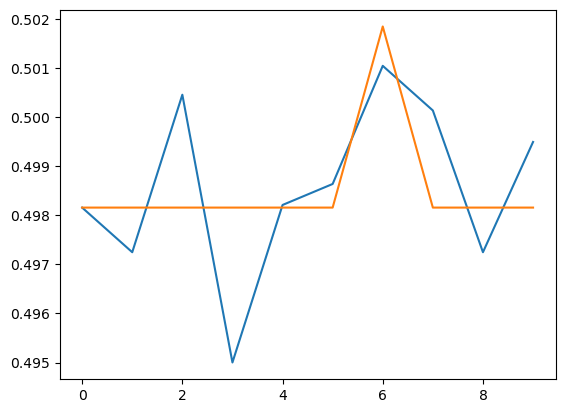

In [61]:
plt.plot(ANN.history['accuracy'])
plt.plot(ANN.history['val_accuracy'])
plt.show()

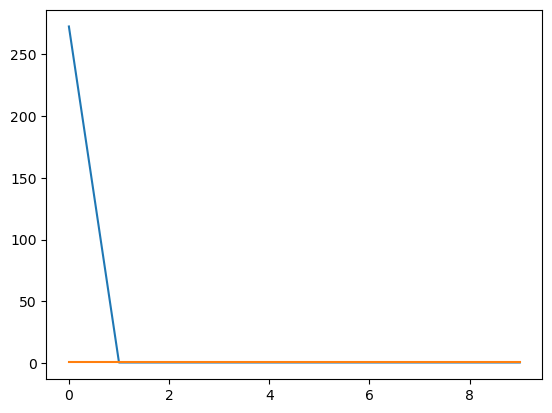

In [63]:
plt.plot(ANN.history['loss'])
plt.plot(ANN.history['val_loss'])
plt.show()

In [149]:
# Reshaping
x_train = x_train.reshape(18709,50,50,3)
x_test = x_test.reshape(6237,50,50,3)
x_train.shape[1:]

(50, 50, 3)

In [150]:
from keras.layers import Conv2D, Dropout, Dense, MaxPooling2D, Flatten
CNN_model = Sequential()
CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',input_shape=x_train.shape[1:], activation = 'relu'))
CNN_model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'))
CNN_model.add(MaxPooling2D(2))
CNN_model.add(Dropout(0.2))


CNN_model.add(Flatten())
CNN_model.add(Dense(50, activation = 'sigmoid'))
CNN_model.add(Dense(1, activation = 'sigmoid'))

CNN_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
CNN = CNN_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
585/585 [==============================] - 90s 153ms/step - loss: 0.6939 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 2/5
585/585 [==============================] - 88s 151ms/step - loss: 0.6938 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 3/5
585/585 [==============================] - 86s 148ms/step - loss: 0.6938 - accuracy: 0.4953 - val_loss: 0.6934 - val_accuracy: 0.5023
Epoch 4/5
585/585 [==============================] - 87s 148ms/step - loss: 0.6938 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 5/5
585/585 [==============================] - 90s 153ms/step - loss: 0.6937 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4977


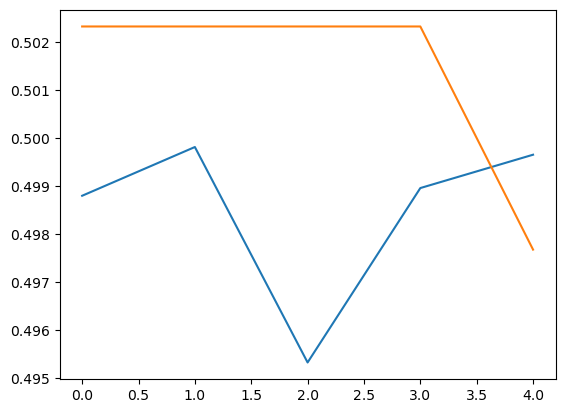

In [152]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.show()

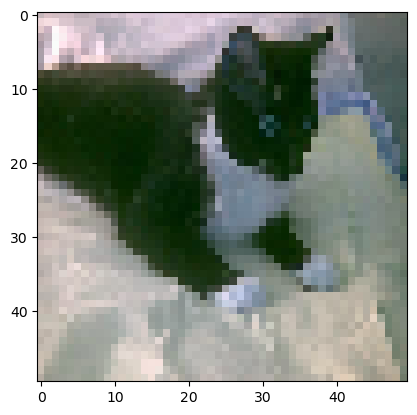

In [243]:
my_image=x_test[0]
plt.imshow(my_image.reshape(50,50,3))

In [244]:
np.argmax(ANN_model.predict(my_image.reshape(1,7500)))

1/1 [==============================] - 1s 729ms/step


0

In [245]:
np.argmax(CNN_model.predict(my_image.reshape(1,50,50,3)))

1/1 [==============================] - 1s 727ms/step


0

In [216]:
y_pred=CNN_model.predict(x_test)
y_pred[:20]

195/195 [==============================] - 4s 22ms/step


array([[0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917],
       [0.5015917]], dtype=float32)

In [104]:
y_pred=np.where(y_pred>0.5,0,1)